In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

Image shape: (450, 280)
Image type: float64
Minimum value 0.0 and maximum value 1.0


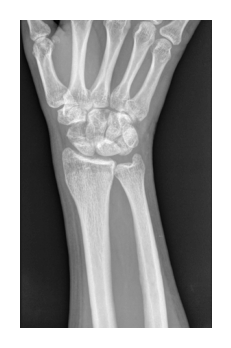

In [14]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread("images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Obraz jako macierz w Pythonie
Obraz to macierz. Analizując koordynaty pikseli korzystając z biblioteki Numpy, należy pamiętać, że pierwsza współrzędna to y (numer wiersza), a druga to x (numer kolumny). Środek układu współrzędnych zaczepiony jest w lewym, górnym rogu obrazu. 

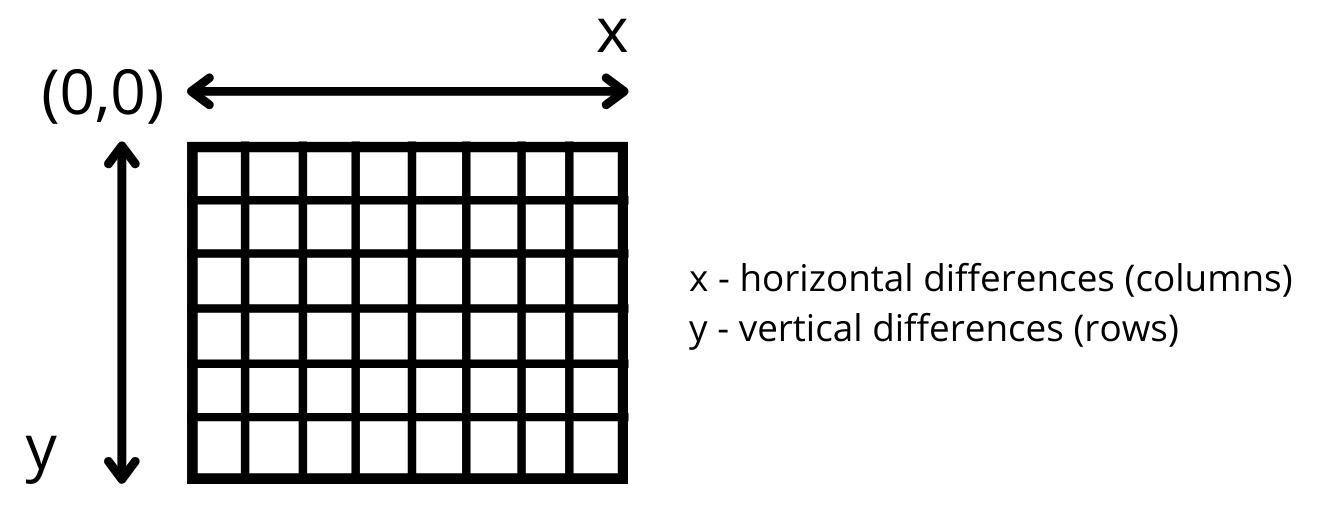

In [27]:
Image(filename="./images/2_2.png", width=600)

# Pochodna
Zacznijmy od analizy funkcji jednej zmiennej. Pochodna takiej funkcji mówi o szybkości zmian wartości funkcji w porównaniu do zmian jej argumentów. Innymi słowy, pochodna funkcji w punkcie x równa się tangensowi kąta nachylenia stycznej do tej funkcji w tym punkcie x. Stycznia jest funkcja liniową, więc pochodna jest równa współczynnikowi kierunkowemu stycznej. O pochodnej możemy również pomyśleć jak o narzędziu do przybliżania kolejnego kroku funkcji, gdyż pochodna mówi o kierunku i szybkości wartości funkcji w małym przedziale wokół danego punktu. 

Całka jest pojęciem odwrotnym do pochodnej i oznacza pole powierzchni pod krzywą danego obszaru funkcji. Całka może byc interpretowana jako narzędzie do obliczania wartości funkcji na podstawie informacji o jej zmianach wartości w innych punktach.

Z kolei, druga pochodna funkcji mówi o tempie zmian szybkości zmiany funkcji w zależności od zmiany jej argumentu. 

Podsumowując, najprościej mówiąc:
1. Pochodna informuje nas o szybkości zmiany funkcji. Przykładowo: pochodna prędkości samochodu to jego przyśpieszenie (jak szybko zmienia sie prędkość w tym konkretnym momencie?), a pochodna drogi pokonanej przez samochód to jego prędkość (jak szybko pokonujemy kolejne odcinki drogi w tym konkretnym momencie?). 
2. Całka mówi nam o całkowitej ilości objętej przez te funkcję. Przykładowo: całka przyśpieszenie samochodu to jego prędkość (jaka jest prędkość jeśli na tym odcinku a-b przyśpieszenie wynosiło tyle?), a całka prędkości auto to pokonana przez nie droga (jaka całkowitą drogę pokonaliśmy jeśli jechaliśmy z taką prędkością na odcinku a-b).
3. Druga pochodna informuje o szybkości zmian pochodnej funkcji. Przykładowo, jeśli mamy drogę pokonaną przez samochód w jakiś czasie, to pierwsza pochodna funkcji powie nam o prędkości tego auta (czyli o szybkości zmiany drogi w czasie), zaś druga pochodna (pochodna prędkości to przyśpieszenie) powie o szybkości zmian tej prędkości w czasie: czy auto przyśpieszało (prędkość rosła), zwalniało (prędkość malała), czy pozostawało stałe (utrzymuje stałą prędkość).

Więcej można przeczytać tutaj: 
- https://www.matemaks.pl/pochodna-funkcji-w-punkcie.html
- https://www.korepetycje.plus/blog/matematyka-rachunek-rozniczkowy-omowienie-pojec-pochodnej-i-calki-zastosowanie-ich-w-zadaniach-praktycznych

# Gradient
W przypadku funkcji wielu zmiennych, mamy do czynienia z gradientem, czyli wektorem zawierającym informację o pochodnych cząstkowych funkcji (dla każdej zmiennej). W efekcie gradient tworzy pole wektorowe wskazujące kierunki najszybszych wzrostów wartości danego pola skalarnego w poszczegolnych punktach. Moduł takiego wektora (jego długość) jest równy szybkości wzrostu pola skalarnego w kierunku najwiekszego wzrostu. 

Patrząc na poniższy obrazek, można to sobie wyobrazić jako nachylenie stoku: ciemno znaczy wyżej, białe znaczy niżej. Im stok jest bardziej stromy w danej lokalizacji, tym szybciej zmienia się wysokość w tym kierunku. Na rysunku po lewej mamy górę po środku, o równomiernym nachyleniu z każde ze stron, natomiast po prawej mamy nachylenie narastające równomiernie od prawej do lewej.

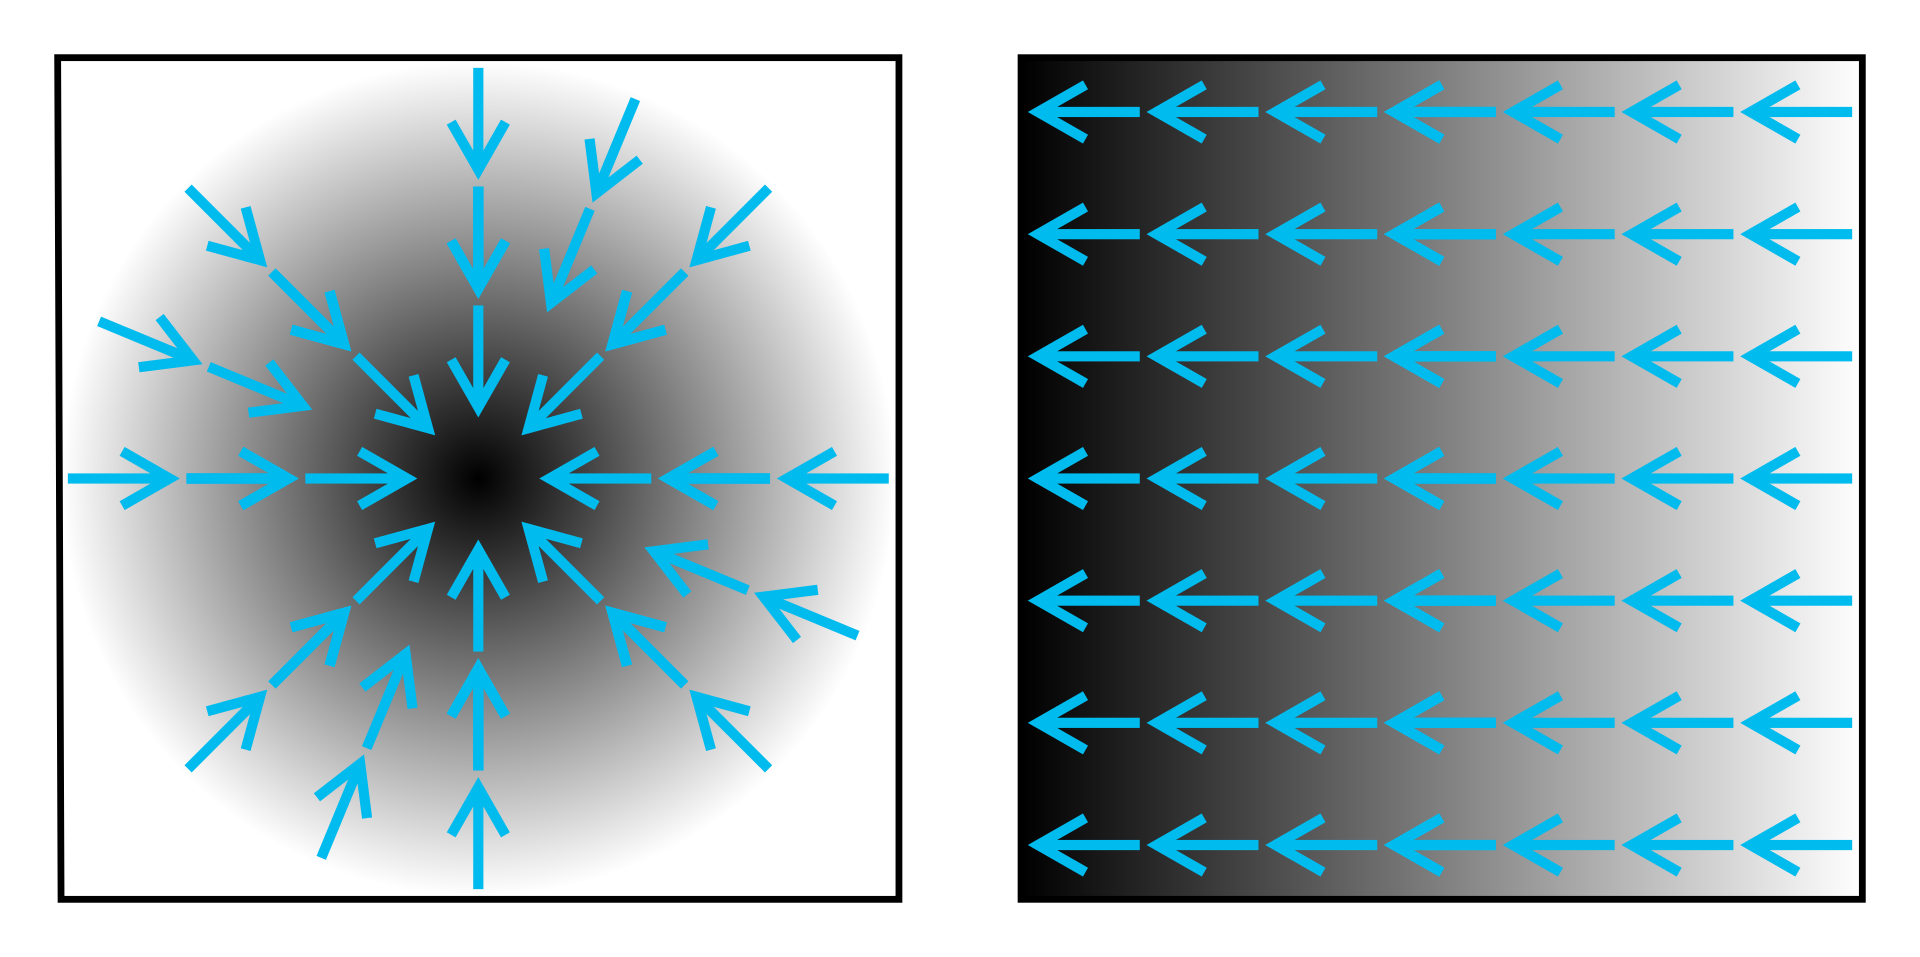

In [29]:
Image(filename="./images/2_1.png", width=500)
# Source: https://pl.wikipedia.org/wiki/Gradient_(matematyka)

Tak jak ustaliliśmy wcześniej, obraz to funkcja wielu zmiennych. Skoro gradient pokazuje szybkość i kierunek zmian takich funkcji, to znaczy, że w przypadku obrazów uwykupla miejsca o dużej różnicy intensywności między dwoma pikselami/wokselami. 

Zastanów się: kiedy możemy się spotkać z taką sytuacją, że piksele obok siebie znacznie różnią się wartością? 
Np. w przypadku obrazów w skali szarości, jeśli obok siebie znajduje się biały i czarny piksel/woksel (jasny / ciemny). Zazwyczaj takie miejsca to krawędzie czyli miejsca o gwałtowej zmianie intensywności. Czyli innymi słowym, gradient może posłużyć do wyznaczania konturów na obrazie, a dodatkowo samemu można zdefiniować jak wyraźne kontury chcemy wykryć (róźnica w intensywności). Jedynym wymogiem jest to, aby na początku przekonwertować obraz do skali szarości.  

Gradient daje informację o szybkości i kierunku zmian dla każdej zmiennej. W przypadku obrazów, jest to gradient wzdłuż osi x i y, czyli pochodne cząstkowe x i y. Kąt (kierunek zmiany) i magnituda (wartość szybkości zmiany) gradientu definiowane są poniższymi wzorami:

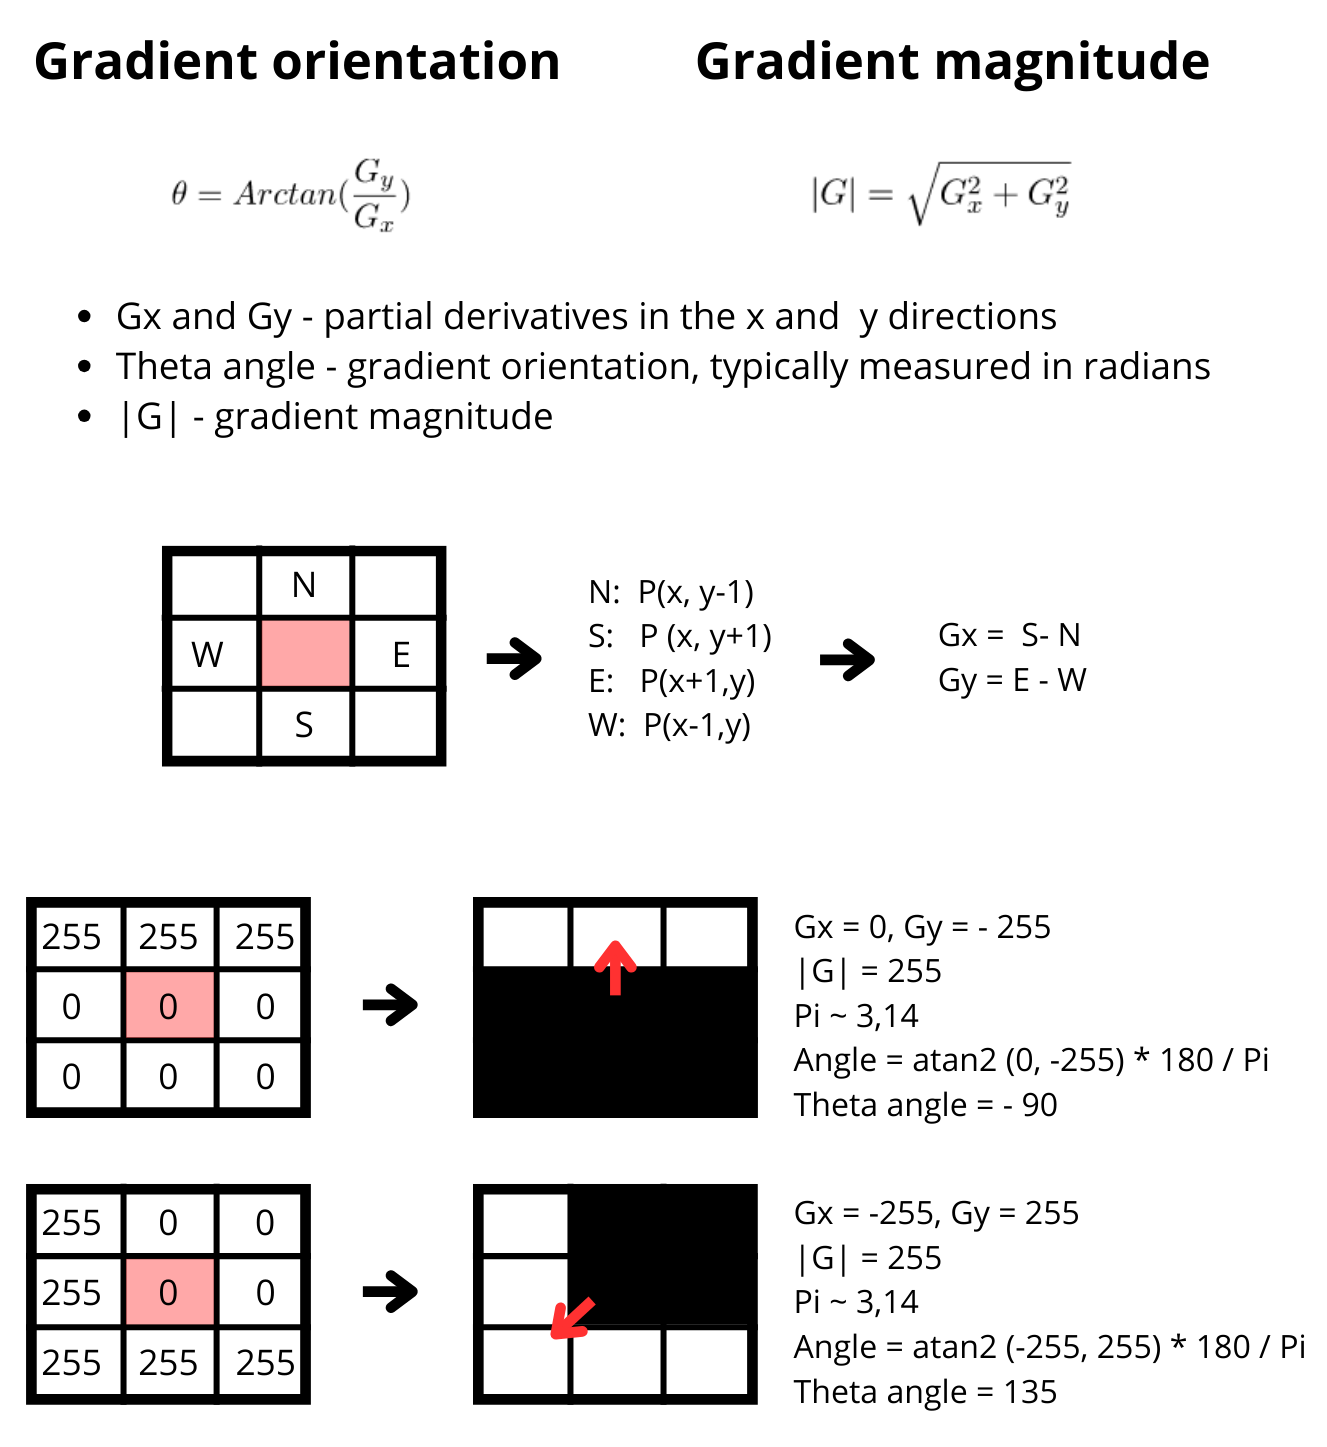

In [30]:
Image(filename="./images/2_3.png", width=500)

Aby jeszcze lepiej zrozumieć pojęcie gradientu, polecam zapoznać się z poniższym artykułem: 
- https://pl.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient
- https://www.baeldung.com/cs/gradient-orientation-magnitude

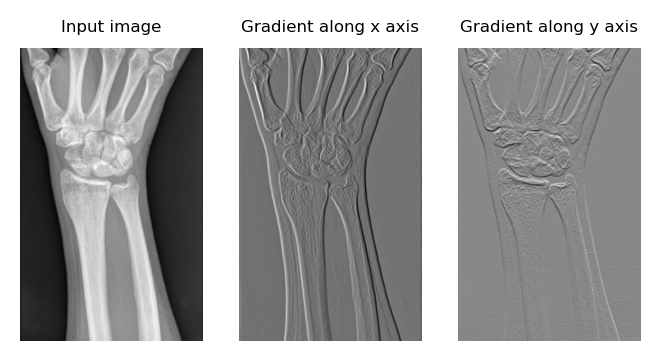

In [31]:
gradient_y, gradient_x = np.gradient(image)

plt.figure(figsize=(4, 2), dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Input image", fontsize=6)
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.title("Gradient along x axis", fontsize=6)
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.title("Gradient along y axis", fontsize=6)
plt.show()

# Rodzaje gradientu
Wyróżniamy kilka rodzajów gradientu, wyrażane poniższymi wzorami:
- przedni (froward)
- wsteczny (backward)
- centralny (central)

Gradientu wstecznego nie jesteśmy w stanie policzyć dla rzędu i kolumny o indeksie 0 (pierwsze). Z kolei gradientu przedniego nie możemy policzyć dla ostatniego rzędu i kolumny. Gradient centralny policzymy dla każdego innego elementu macierzy. jedynie jest to niemożliwe podczas obliczeń w czasie rzeczywistym, gdy nie znamy danych z kolejnej chwili czasowej (wtedy liczymy tylko gradient w tył).

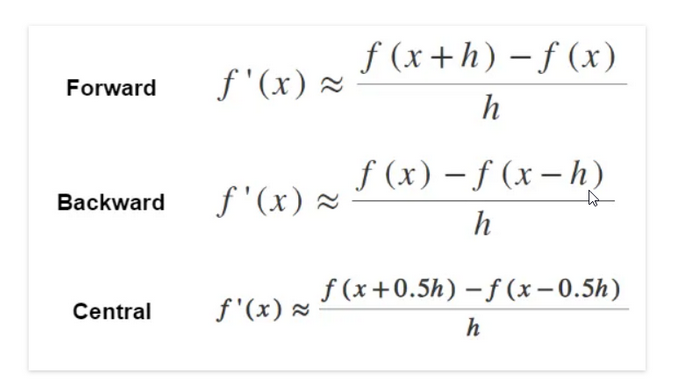

In [33]:
Image(filename="./images/2_4.png", width=500)

In [ ]:
def our_gradient_boundaries(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
  
  # TO DO 1 - implement forward/backward gradient on image boundaries
  # df(x, y) / dx = (f(x + step, y) - f(x - step, y)) / 2*step #Centrale
  # df(x, y) / dx = (f(x + step, y) - f(x, y)) /step #Forward
  # df(x, y) / dx = (f(x, y) - f(x - step, y)) /step #Backward

  gradient_y [1:-1, : ] = (image[2:,:] - image[0:-2,:]) /2
  gradient_x [ :, 1:-1 ] = (image[:,2:] - image[:,0:-2]) /2
  
  gradient_y[0,:] = (image[1,:] - image[0,:])/1
  gradient_x[:,0] = (image[:,1] - image[:,0])/1

  gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1
  gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1

  return gradient_y, gradient_x

In [ ]:
def our_gradient_loops(image):
  
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
 
  for i in range (1,image.shape[0] -1): 
    for j in range (1,image.shape[1] -1): 
      gradient_y [i,j ] = (image[i+1,j] - image[i-1,j]) /2
      gradient_x [ i,j ] = (image[i,j+1] - image[i,j-1]) /2
  
  gradient_y[0,:] = (image[1,:] - image[0,:])/1
  gradient_x[:,0] = (image[:,1] - image[:,0])/1

  gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1
  gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1 

  return gradient_y, gradient_x

Our gradient without loops - time:  0.0026590824127197266


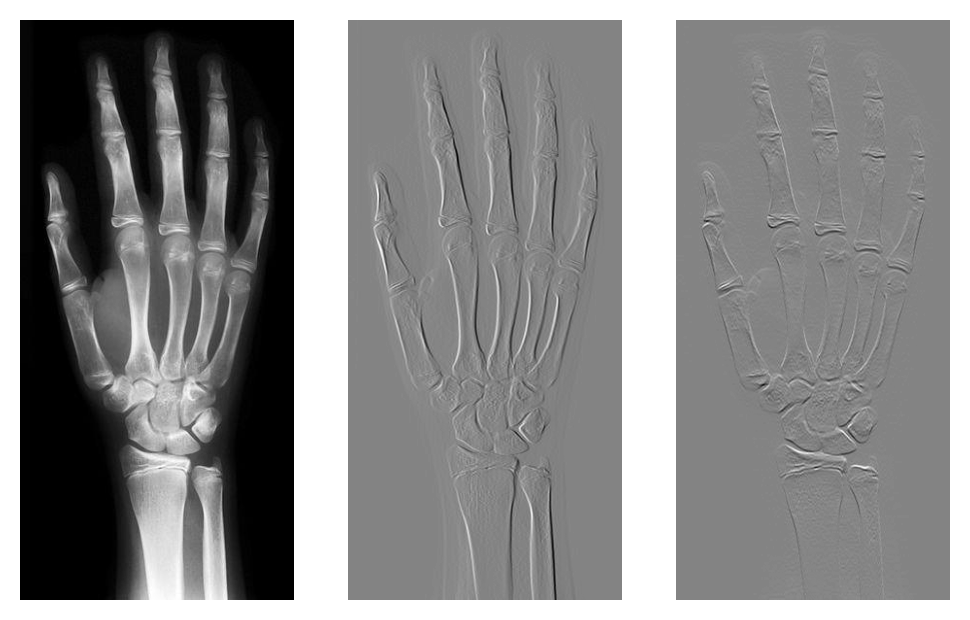

Our gradient with loops - time:  0.4395914077758789


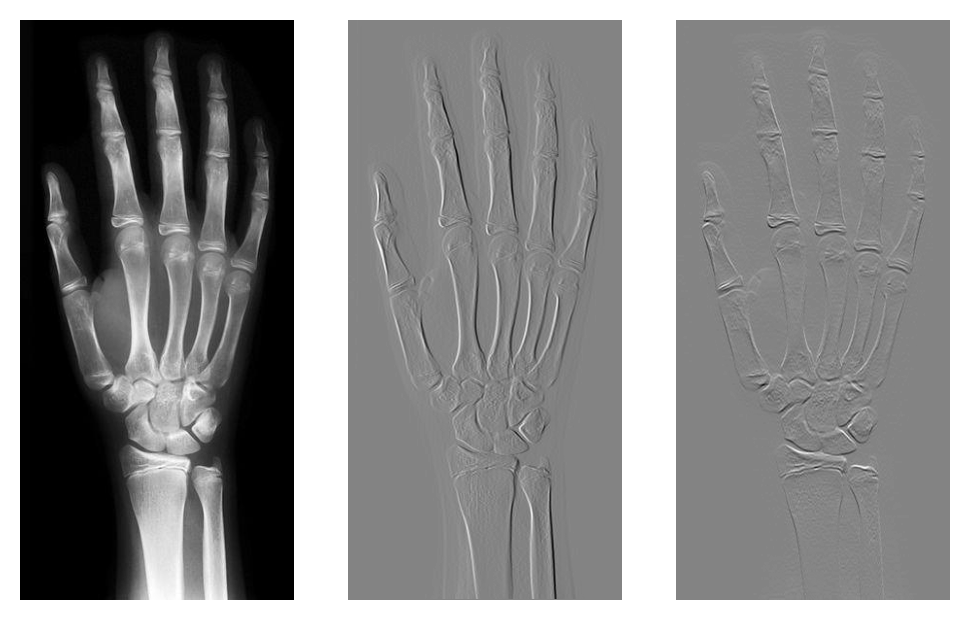

In [ ]:
start = time.time()
gradient_y, gradient_x = our_gradient_boundaries(image)
end = time.time()
print("Our gradient without loops - time: ", end - start )

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

start = time.time()
gradient_y, gradient_x = our_gradient_loops(image)
end = time.time()
print("Our gradient with loops - time: ", end - start )

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
def our_gradient_2(image):
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x) / 2
  gradient_y = signal.correlate2d(image, window_y) / 2
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

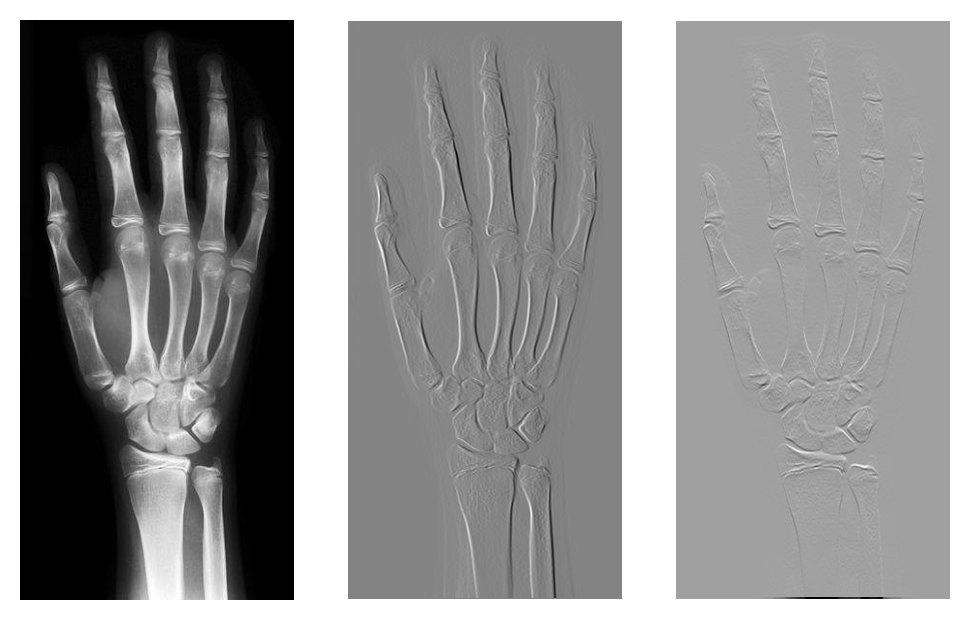

In [ ]:
gradient_y, gradient_x = our_gradient_2(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def sobel_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

def prewitt_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

In [ ]:
gradient_y, gradient_x = sobel_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradient_y, gradient_x = prewitt_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradient_magnitude = lambda gradient_x, gradient_y: np.sqrt(gradient_x**2 + gradient_y**2)

g_mag = gradient_magnitude(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_mag, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


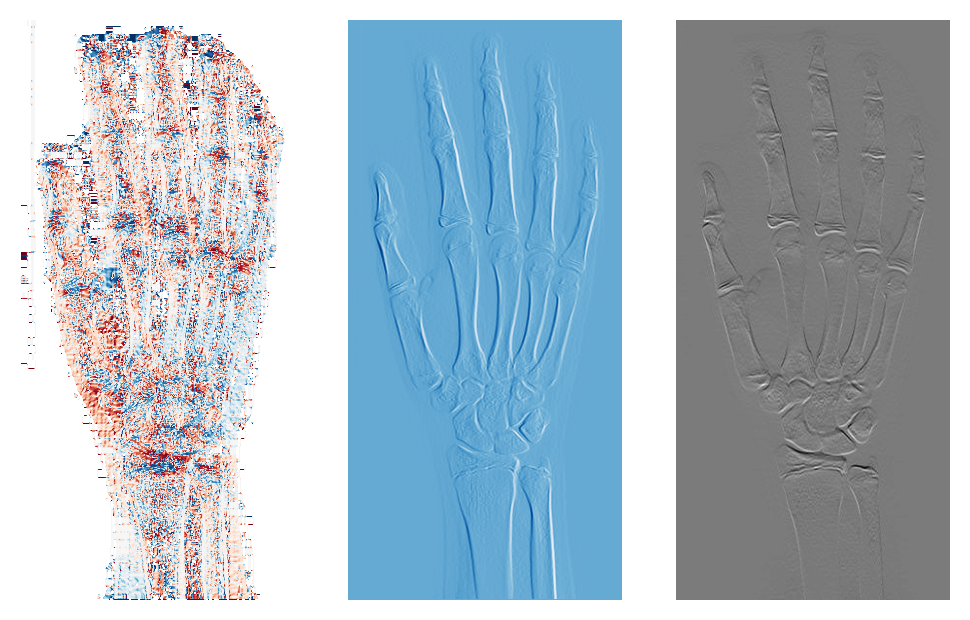

In [ ]:
# TO DO 3 - implement gradient angle (using color map)
gradient_angle = lambda gradient_x, gradient_y: np.arctan(gradient_y/gradient_x)

g_angle = gradient_angle(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_angle, cmap='RdBu')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x,cmap='Blues')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
def laplacian(image):
  window = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]                     
  ])
  laplacian_image = signal.correlate2d(image, window)
  img_reshape = np.pad(image, 1, 'edge')
  img_with_laplacian = laplacian_image + img_reshape 
  return laplacian_image, img_with_laplacian

In [ ]:
laplacian_image, image_with_laplacian = laplacian(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_plus_laplacian, cmap='gray')
plt.axis('off')
plt.show()